### Showcase of interpolation on Experiment level for encoded videos and images in greyscale and RGB.

In [1]:
# import dependencies

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
# get the experiment class from experanto 
from experanto.experiment import Experiment

# set experiment folder as root
root_folder = '../../../allen-exporter/data/allen_data/experiment_951980471'

# initialize experiment object
e = Experiment(root_folder)

KeyboardInterrupt: 

In [ ]:
times = np.arange(310., 340., 0.5)
video = e.interpolate(times, device="screen")  # shape: (C, T, H, W)

# Clip and convert to uint8 to avoid matplotlib clipping warnings
video = np.clip(video, 0, 255).astype(np.uint8)
video = video.transpose(1, 2, 3, 0)  # (T, H, W, C)

n_frames, height, width, channels = video.shape
print(f"Video shape: {video.shape}")

# Handle grayscale vs color
is_grayscale = (channels == 1)
if is_grayscale:
    video = video[..., 0]  # Now shape: (T, H, W)

fig, ax = plt.subplots()

# Initialize with appropriate cmap
if is_grayscale:
    img = ax.imshow(video[0], cmap='gray', vmin=0, vmax=255)
else:
    img = ax.imshow(video[0])

ax.axis('off')

def update(frame):
    img.set_array(video[frame])
    ax.set_title(f'Frame {frame}')
    return [img]

ani = animation.FuncAnimation(fig, update, frames=n_frames, interval=50, blit=True)

plt.close(fig)
HTML(ani.to_jshtml())

Video shape: (60, 144, 256, 3)


In [ ]:
%%timeit
video = e.interpolate(times, device="screen")

638 ms ± 7.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
times = np.arange(4484., 4500., 0.5)
video = e.interpolate(times, device="screen")  # shape: (C, T, H, W)

# Clip and convert to uint8 to avoid matplotlib clipping warnings
video = np.clip(video, 0, 255).astype(np.uint8)
video = video.transpose(1, 2, 3, 0)  # (T, H, W, C)

n_frames, height, width, channels = video.shape
print(f"Video shape: {video.shape}")

# Handle grayscale vs color
is_grayscale = (channels == 1)
if is_grayscale:
    video = video[..., 0]  # Now shape: (T, H, W)

fig, ax = plt.subplots()

# Initialize with appropriate cmap
if is_grayscale:
    img = ax.imshow(video[0], cmap='gray', vmin=0, vmax=255)
else:
    img = ax.imshow(video[0])

ax.axis('off')

def update(frame):
    img.set_array(video[frame])
    ax.set_title(f'Frame {frame}')
    return [img]

ani = animation.FuncAnimation(fig, update, frames=n_frames, interval=50, blit=True)

plt.close(fig)
HTML(ani.to_jshtml())

Video shape: (32, 144, 256, 3)


In [ ]:
%%timeit
video = e.interpolate(times, device="screen")

1.03 s ± 25.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


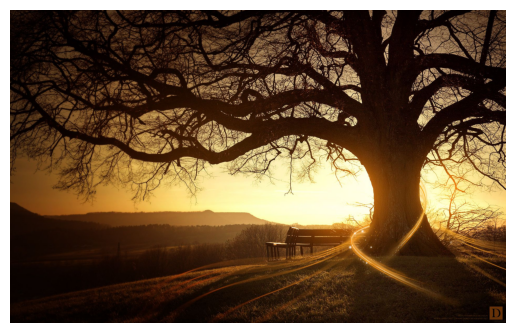

In [ ]:
# Download a test_rgb_image.jpg (1200x1900!) put it into the folder with other stimuli and run this to test rgb interpolation in the third cell.
# My test image : https://wallpapercave.com/download/1900x1200-wallpapers-wp9725873
# Also adjust number_channels to 3 inside the default.yaml config file

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the JPEG image (in BGR format)
img = cv2.imread('../../../allen-exporter/data/allen_data/experiment_951980471/stimuli/test_rgb_image.jpg')

# Optional: convert from BGR to RGB if you want
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image
plt.imshow(img_rgb)
plt.axis('off')  # hide axes
plt.show()

# Save the image as a .npy file
np.save('../../../allen-exporter/data/allen_data/experiment_951980471/stimuli/im065.npy', img_rgb)
